In [364]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [365]:
#Importing the dataset
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

In [366]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [367]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [368]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [369]:
df_train.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature'],axis=1, inplace = True)

In [370]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [371]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [372]:
df_train.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [373]:
#choice best one to fill
print(df_train["LotFrontage"].mean())
print(df_train["LotFrontage"].median())
print(df_train["LotFrontage"].mode())

70.04995836802665
69.0
0    60.0
Name: LotFrontage, dtype: float64


In [374]:
#choice best one to fill
print(df_train["MasVnrArea"].mean())
print(df_train["MasVnrArea"].median())
print(df_train["MasVnrArea"].mode())

103.68526170798899
0.0
0    0.0
Name: MasVnrArea, dtype: float64


In [375]:
#choice best one to fill
print(df_train["GarageYrBlt"].mean())
print(df_train["GarageYrBlt"].median())
print(df_train["GarageYrBlt"].mode())

1978.5061638868744
1980.0
0    2005.0
Name: GarageYrBlt, dtype: float64


In [376]:
#fillna
df_train["LotFrontage"].fillna(df_train["LotFrontage"].median(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median(), inplace=True)

In [377]:
df_train.select_dtypes('number').isna().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [378]:
df_train.select_dtypes('object').isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
Fence             True
SaleType         False
SaleCondition    False
dtype: bool

In [379]:
df_train.select_dtypes('object').isnull().sum()

MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
Fence            1179
SaleType            0
SaleCondition       0
dtype: int64

In [380]:
#encoder train file
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)
df_train['GarageType'].fillna('No Garage', inplace=True)

df_train=pd.get_dummies(data=df_train, columns=['MSZoning','Street','LandContour','LotConfig','LandSlope','Neighborhood'
                                               ,'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
                                               ,'Exterior1st','Exterior2nd','Foundation','Heating','Electrical','Functional'
                                               ,'GarageType','PavedDrive','SaleType','SaleCondition'],dtype='int')

In [381]:
# create object of Ordinalencoding
LotShape=ce.OneHotEncoder(cols='LotShape',handle_unknown='return_nan',return_df=True,use_cat_names=True)

LotShape= ce.OrdinalEncoder(cols=['LotShape'],return_df=True,
                           mapping=[{'col':'LotShape',
'mapping':{'IR3':0,'IR2':1,'IR1':2,'Reg':3}}])


df_train = LotShape.fit_transform(df_train)

In [382]:
Utilities=ce.OneHotEncoder(cols='Utilities',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
Utilities= ce.OrdinalEncoder(cols=['Utilities'],return_df=True,
                           mapping=[{'col':'Utilities',
'mapping':{'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}}])
                         
df_train = Utilities.fit_transform(df_train)

In [383]:
df_train['MasVnrType'].fillna('None', inplace=True)

MasVnrType=ce.OneHotEncoder(cols='MasVnrType',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
MasVnrType= ce.OrdinalEncoder(cols=['MasVnrType'],return_df=True,
                           mapping=[{'col':'MasVnrType',
'mapping':{'None':0,'CBlock':1,'BrkCmn':2,'BrkFace':3,'Stone':4}}])
                         
df_train = MasVnrType.fit_transform(df_train)

In [384]:
ExterQual=ce.OneHotEncoder(cols='ExterQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
ExterQual= ce.OrdinalEncoder(cols=['ExterQual'],return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_train = ExterQual.fit_transform(df_train)

In [385]:
ExterCond=ce.OneHotEncoder(cols='ExterCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
ExterCond= ce.OrdinalEncoder(cols=['ExterCond'],return_df=True,
                           mapping=[{'col':'ExterCond',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_train = ExterCond.fit_transform(df_train)

In [386]:
BsmtQual=ce.OneHotEncoder(cols='BsmtQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtQual= ce.OrdinalEncoder(cols=['BsmtQual'],return_df=True,
                           mapping=[{'col':'BsmtQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_train = BsmtQual.fit_transform(df_train)

In [387]:
BsmtExposure=ce.OneHotEncoder(cols='BsmtExposure',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtExposure= ce.OrdinalEncoder(cols=['BsmtExposure'],return_df=True,
                           mapping=[{'col':'BsmtExposure',
'mapping':{'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}}])
                         
df_train = BsmtExposure.fit_transform(df_train)

In [388]:
BsmtCond=ce.OneHotEncoder(cols='BsmtCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtCond= ce.OrdinalEncoder(cols=['BsmtCond'],return_df=True,
                           mapping=[{'col':'BsmtCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_train = BsmtCond.fit_transform(df_train)

In [389]:
BsmtFinType1=ce.OneHotEncoder(cols='BsmtFinType1',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtFinType1= ce.OrdinalEncoder(cols=['BsmtFinType1'],return_df=True,
                           mapping=[{'col':'BsmtFinType1',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}}])
                         
df_train = BsmtFinType1.fit_transform(df_train)

In [390]:
BsmtFinType2=ce.OneHotEncoder(cols='BsmtFinType2',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtFinType2= ce.OrdinalEncoder(cols=['BsmtFinType2'],return_df=True,
                           mapping=[{'col':'BsmtFinType2',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}}])
                         
df_train = BsmtFinType2.fit_transform(df_train)

In [391]:
HeatingQC=ce.OneHotEncoder(cols='HeatingQC',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
HeatingQC= ce.OrdinalEncoder(cols=['HeatingQC'],return_df=True,
                           mapping=[{'col':'HeatingQC',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_train = HeatingQC.fit_transform(df_train)

In [392]:
KitchenQual=ce.OneHotEncoder(cols='KitchenQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
KitchenQual= ce.OrdinalEncoder(cols=['KitchenQual'],return_df=True,
                           mapping=[{'col':'KitchenQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_train = KitchenQual.fit_transform(df_train)

In [393]:
FireplaceQu=ce.OneHotEncoder(cols='FireplaceQu',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
FireplaceQu= ce.OrdinalEncoder(cols=['FireplaceQu'],return_df=True,
                           mapping=[{'col':'FireplaceQu',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_train = FireplaceQu.fit_transform(df_train)

In [394]:
GarageFinish=ce.OneHotEncoder(cols='GarageFinish',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageFinish= ce.OrdinalEncoder(cols=['GarageFinish'],return_df=True,
                           mapping=[{'col':'GarageFinish',
'mapping':{'NA':0,'Unf':1,'RFn':2,'Fin':3}}])
                         
df_train = GarageFinish.fit_transform(df_train)

In [395]:
GarageQual=ce.OneHotEncoder(cols='GarageQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageQual= ce.OrdinalEncoder(cols=['GarageQual'],return_df=True,
                           mapping=[{'col':'GarageQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_train = GarageQual.fit_transform(df_train)

In [396]:
GarageCond=ce.OneHotEncoder(cols='GarageCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageCond= ce.OrdinalEncoder(cols=['GarageCond'],return_df=True,
                           mapping=[{'col':'GarageCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_train = GarageCond.fit_transform(df_train)

In [397]:
Fence=ce.OneHotEncoder(cols='Fence',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
Fence= ce.OrdinalEncoder(cols=['Fence'],return_df=True,
                           mapping=[{'col':'Fence',
'mapping':{'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}}])
                         
df_train = Fence.fit_transform(df_train)

In [398]:
df_train['CentralAir'] = df_train['CentralAir'].apply(lambda x: 0 if x=='N' else 1)

In [399]:
df_train.isna().any()

MSSubClass               False
LotFrontage              False
LotArea                  False
LotShape                 False
Utilities                False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrType               False
MasVnrArea               False
ExterQual                False
ExterCond                False
BsmtQual                 False
BsmtCond                 False
BsmtExposure             False
BsmtFinType1             False
BsmtFinSF1               False
BsmtFinType2             False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
HeatingQC                False
CentralAir               False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomA

In [400]:
df_train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
LotShape                 0
Utilities                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
F

In [401]:
#removed outliers from train file
for column in df_train.columns:
    data_mean = df_train[column].mean()
    data_std = df_train[column].std()
    cut_off = data_std * 3
    lower = data_mean - cut_off
    upper = data_mean + cut_off
    outliers_removed = [x for x in df_train[column] if x > lower and x < upper]
    print( pd.DataFrame(outliers_removed).shape)

(1430, 1)
(1444, 1)
(1447, 1)
(1450, 1)
(1459, 1)
(1458, 1)
(1432, 1)
(1454, 1)
(1460, 1)
(1460, 1)
(1428, 1)
(1460, 1)
(1428, 1)
(1423, 1)
(1423, 1)
(1460, 1)
(1460, 1)
(1454, 1)
(1427, 1)
(1410, 1)
(1449, 1)
(1450, 1)
(1459, 1)
(1365, 1)
(1448, 1)
(1456, 1)
(1440, 1)
(1444, 1)
(1444, 1)
(1378, 1)
(1460, 1)
(1448, 1)
(1446, 1)
(1392, 1)
(1460, 1)
(1448, 1)
(1455, 1)
(1460, 1)
(1458, 1)
(1460, 1)
(1460, 1)
(1453, 1)
(1379, 1)
(1379, 1)
(1438, 1)
(1433, 1)
(1409, 1)
(1437, 1)
(1405, 1)
(1453, 1)
(1460, 1)
(1452, 1)
(1460, 1)
(1460, 1)
(1438, 1)
(1450, 1)
(1395, 1)
(1444, 1)
(1460, 1)
(1460, 1)
(1454, 1)
(1454, 1)
(1397, 1)
(1410, 1)
(1424, 1)
(1460, 1)
(1460, 1)
(1366, 1)
(1413, 1)
(1456, 1)
(1460, 1)
(1382, 1)
(1395, 1)
(1447, 1)
(1443, 1)
(1458, 1)
(1444, 1)
(1402, 1)
(1432, 1)
(1460, 1)
(1409, 1)
(1360, 1)
(1381, 1)
(1423, 1)
(1443, 1)
(1411, 1)
(1460, 1)
(1451, 1)
(1387, 1)
(1419, 1)
(1383, 1)
(1347, 1)
(1435, 1)
(1386, 1)
(1401, 1)
(1374, 1)
(1435, 1)
(1422, 1)
(1449, 1)
(1412, 1)


Standard Deviation of df_train_LotArea is 9981.26493237915 


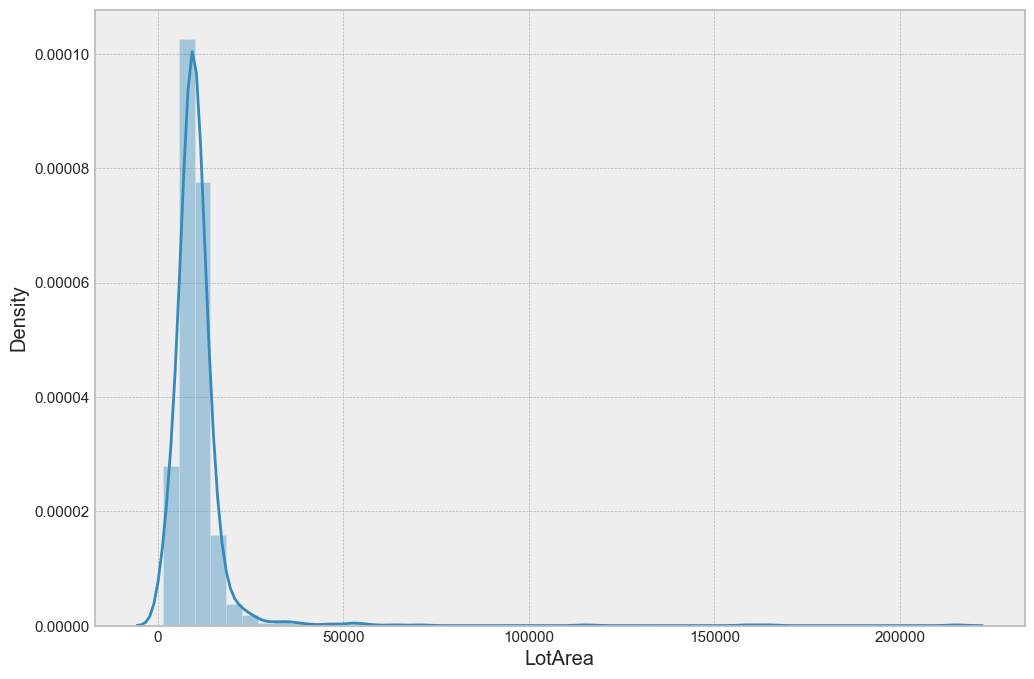

In [412]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['LotArea'])
import statistics
print("Standard Deviation of df_train_LotArea is % s " 
                % (statistics.stdev(df_train['LotArea'])))

In [293]:
df_train.shape

(1460, 223)

In [294]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,3,7,5,2003,2003,3,196.0,3,2,4.0,3.0,1.0,6.0,706,1.0,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,-1.0,2003.0,2.0,2,548,3.0,3.0,0,61,0,0,0,0,-1.0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,

In [295]:
XCol=["MSSubClass", "LotFrontage","LotArea","LotShape","Utilities", "OverallQual","OverallCond","YearBuilt",
                                                       "YearRemodAdd","MasVnrType","MasVnrArea","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
                                                       "BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","HeatingQC","CentralAir"
                                                       ,"1stFlrSF","1stFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr"
                                                        ,"KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageYrBlt","GarageFinish","GarageCars"
                                                       ,"GarageArea","GarageQual","GarageCond","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"
                                                       ,"Fence","MiscVal","MoSold","YrSold","MSZoning_C (all)","MSZoning_FV","MSZoning_RH","MSZoning_RL","MSZoning_RM"
                                                       ,"Street_Grvl","Street_Pave","LandContour_Bnk","LandContour_HLS","LandContour_Low","LandContour_Lvl","LotConfig_Corner"
                                                       ,"LotConfig_CulDSac","LotConfig_FR2","LotConfig_FR3","LotConfig_Inside","LandSlope_Gtl","LandSlope_Mod","LandSlope_Sev"
                                                       ,"Neighborhood_Blmngtn","Neighborhood_Blueste","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr"
                                                       ,"Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV"
                                                       ,"Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt"
                                                       ,"Neighborhood_OldTown","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr"
                                                       ,"Neighborhood_Timber","Neighborhood_Veenker","Condition1_Artery","Condition1_Feedr","Condition1_Norm","Condition1_PosA"
                                                       ,"Condition1_PosN","Condition1_RRAe","Condition1_RRAn","Condition1_RRNe","Condition1_RRNn","Condition2_Artery","Condition2_Feedr"
                                                       ,"Condition2_Norm","Condition2_PosA","Condition2_PosN","Condition2_RRAe","Condition2_RRAn","Condition2_RRNn","BldgType_1Fam"
                                                       ,"BldgType_2fmCon","BldgType_Duplex","BldgType_Twnhs","BldgType_TwnhsE","HouseStyle_1.5Fin","HouseStyle_1.5Unf","HouseStyle_1Story"
                                                       ,"HouseStyle_2.5Fin","HouseStyle_2.5Unf","HouseStyle_2Story","HouseStyle_SFoyer","HouseStyle_SLvl","RoofStyle_Flat","RoofStyle_Gable"
                                                       ,"RoofStyle_Gambrel","RoofStyle_Hip","RoofStyle_Mansard","RoofStyle_Shed","RoofMatl_ClyTile","RoofMatl_CompShg","RoofMatl_Membran"
                                                       ,"RoofMatl_Metal","RoofMatl_Roll","RoofMatl_Tar&Grv","RoofMatl_WdShake","RoofMatl_WdShngl","Exterior1st_AsbShng","Exterior1st_AsphShn"
                                                       ,"Exterior1st_BrkComm","Exterior1st_BrkFace","Exterior1st_CBlock","Exterior1st_CemntBd","Exterior1st_HdBoard","Exterior1st_ImStucc"
                                                       ,"Exterior1st_MetalSd","Exterior1st_Plywood","Exterior1st_Stone","Exterior1st_Stucco","Exterior1st_VinylSd","Exterior1st_Wd Sdng"
                                                       ,"Exterior1st_WdShing","Exterior2nd_AsbShng","Exterior2nd_AsphShn","Exterior2nd_Brk Cmn","Exterior2nd_BrkFace","Exterior2nd_CBlock"
                                                       ,"Exterior2nd_CmentBd","Exterior2nd_HdBoard","Exterior2nd_ImStucc","Exterior2nd_MetalSd","Exterior2nd_Other","Exterior2nd_Plywood"
                                                       ,"Exterior2nd_Stone","Exterior2nd_Stucco","Exterior2nd_VinylSd","Exterior2nd_Wd Sdng","Exterior2nd_Wd Shng","Foundation_BrkTil"
                                                       ,"Foundation_CBlock","Foundation_PConc","Foundation_Slab","Foundation_Stone","Foundation_Wood","Heating_Floor","Heating_GasA"
                                                       ,"Heating_GasW","Heating_Grav","Heating_OthW","Heating_Wall","Electrical_FuseA","Electrical_FuseF","Electrical_FuseP","Electrical_Mix"
                                                       ,"Electrical_SBrkr","Functional_Maj1","Functional_Maj2","Functional_Min1","Functional_Min2","Functional_Mod","Functional_Sev","Functional_Typ"
                                                       ,"GarageType_2Types","GarageType_Attchd","GarageType_Basment","GarageType_BuiltIn","GarageType_CarPort","GarageType_Detchd","GarageType_No Garage"
                                                       ,"PavedDrive_N","PavedDrive_P","PavedDrive_Y","SaleType_COD","SaleType_CWD","SaleType_Con","SaleType_ConLD","SaleType_ConLI"
                                                       ,"SaleType_ConLw","SaleType_New","SaleType_Oth","SaleType_WD","SaleCondition_Abnorml","SaleCondition_AdjLand","SaleCondition_Alloca"
                                                       ,"SaleCondition_Family","SaleCondition_Normal","SaleCondition_Partial"]
yCol=['SalePrice']

In [296]:
X_train=df_train[XCol]

In [297]:
y_train=df_train[yCol]

In [298]:
#Normalization y_train
yScaler = MinMaxScaler()
y_train = yScaler.fit_transform(y_train)


In [299]:
#Normalization X_train
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X_train)

In [300]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) 
pca.fit(X_rescaled)
X_train = pca.transform(X_rescaled)

In [301]:
X_train = pd.DataFrame(X_train)

In [302]:
#check if there is correlation between features
X_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,1.000000e+00,-2.362196e-17,6.329353e-16,2.887572e-16,-1.041494e-16,2.406044e-16,-3.879373e-17,-4.294487e-17,4.634292e-17,-1.460120e-16,7.321327e-17,2.548330e-16,3.484783e-16,2.857795e-16,-2.640856e-16,-5.788436e-17,1.505511e-16,8.492519e-17,1.464748e-16,-2.382628e-16,2.280279e-16,-1.067878e-16,-7.324231e-17,-5.252356e-17,-2.011011e-16,-2.782660e-16,-3.412732e-16,3.729503e-17,2.931653e-16,-7.815811e-17,-2.936142e-16,-2.343625e-17,3.790973e-16,2.964479e-17,7.435909e-17,2.753970e-16,-7.247693e-17,3.329757e-16,-9.837151e-17,2.473003e-17,-1.045068e-16,1.319184e-16,1.537797e-17,1.831749e-16,-5.436109e-16,-5.535928e-17,4.448287e-16,-3.380928e-16,6.322685e-17,-5.159796e-17,3.607152e-17,-5.584240e-16,4.703075e-17,3.823847e-16,-6.304356e-16,-2.351978e-16,3.150695e-16,2.485535e-16,-2.084429e-16,5.915157e-17,-1.276456e-16,1.900976e-16,2.615882e-16,-1.643343e-16,1.244425e-16,-4.764608e-16,6.541340e-17,-6.588141e-16,-2.535911e-16,-4.949073e-17,3.376156e-16,-5.948216e-16,3.046298e-16,-5.488540e-16,-1.539652e-16,3.935668e-16,8.353163e-16,-6.614492e-16,5.404485e-16,2.988215e-16,-3.861299e-16,3.166195e-16,-5.083437e-16,-1.151147e-16,4.117649e-16,9.790848e-16,-2.539196e-16
1,-2.362196e-17,1.000000e+00,8.947277e-16,8.805538e-16,-7.665005e-17,-1.531442e-16,-7.265982e-17,4.421644e-18,-2.214220e-17,-3.182501e-16,3.946671e-16,-4.470880e-17,-1.981170e-17,-2.771303e-17,-1.597946e-16,3.395179e-17,1.433632e-17,1.029644e-15,-5.209431e-17,2.889385e-17,-5.061966e-17,2.614664e-16,-2.018644e-16,8.650834e-17,1.841779e-16,3.931156e-17,-4.234024e-17,-5.254957e-17,1.230695e-16,-2.146756e-16,1.887848e-16,8.836286e-17,6.425261e-17,-2.783007e-16,-6.326788e-17,-2.497688e-17,-3.455053e-17,2.667202e-16,-2.028012e-16,-2.808729e-16,-2.233264e-16,7.335886e-17,7.374804e-18,-1.179572e-16,3.065159e-16,2.855056e-16,1.923967e-16,6.068948e-17,-1.769446e-16,-1.725701e-16,7.700933e-17,-3.039871e-17,7.172485e-18,1.126969e-16,-1.658614e-16,2.599025e-17,-1.728583e-16,3.194432e-16,-5.055277e-17,1.869605e-16,1.642467e-16,8.909081e-17,-6.028109e-17,1.535524e-16,-1.286214e-16,-1.637913e-16,-2.593857e-16,3.757791e-16,-1.198146e-16,1.470867e-16,3.698759e-16,1.981014e-16,-1.688973e-16,-2.555047e-16,-2.607183e-16,-4.666682e-16,1.708271e-16,1.883374e-16,2.632713e-18,-1.869522e-16,1.094323e-16,1.705941e-16,-7.410296e-17,4.696213e-17,2.776554e-16,-2.140820e-16,5.824696e-16
2,6.329353e-16,8.947277e-16,1.000000e+00,-1.455898e-16,5.414047e-17,-1.172913e-17,-3.318114e-16,-1.245743e-17,-2.394841e-16,-1.040637e-16,-1.349986e-17,2.201838e-16,4.321768e-16,-2.617594e-16,5.208705e-16,-2.389258e-16,8.908763e-17,-6.426216e-16,3.118695e-16,1.192568e-16,-5.037518e-17,-2.612689e-16,9.839368e-17,4.836332e-17,2.655043e-16,-1.144847e-16,4.006747e-17,-5.577276e-17,-5.001674e-17,-1.050532e-16,-4.889211e-17,4.723976e-17,-6.844163e-17,-4.222732e-17,-1.618147e-16,2.048851e-16,-2.043150e-16,4.222509e-17,2.217521e-16,-4.587883e-18,1.905676e-16,-2.385963e-16,-6.274281e-17,7.690401e-17,1.599260e-16,-7.906754e-17,-2.241526e-16,1.620592e-16,8.572789e-18,1.374678e-16,8.901610e-17,-4.599175e-16,5.918780e-17,9.646041e-17,3.264850e-17,1.689186e-18,8.819504e-17,-2.946123e-16,-1.411867e-16,1.926917e-16,-8.961182e-17,-3.377881e-16,4.809991e-17,2.648987e-16,-6.018473e-17,-2.328233e-16,1.092298e-16,8.151588e-17,-1.039747e-16,-1.614182e-16,1.135267e-16,7.900774e-17,-2.071587e-16,-3.702561e-16,4.633146e-17,3.500844e-17,3.245863e-17,-1.067944e-16,-1.812950e-18,9.096906e-17,1.113715e-17,1.717926e-17,-2.596539e-16,9.304589e-19,-5.316469e-17,1.264588e-16,-4.811407e-16
3,2.887572e-16,8.805538e-16,-1.455898e-16,1.000000e+00,7.307640e-17,-9.457068e-17,-8.753843e-18,4.661656e-16,-1.176081e-17,2.444828e-16,-4.352209e-16,3.305416e-16,2.900491e-16,-8.053761e-17,3.456150e-17,7.850608e-17,4.27975

In [303]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [304]:
# test file
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [305]:
df_test.shape

(1459, 80)

In [306]:
df_test.isna().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1        True
BsmtFinType2      True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [307]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [308]:
df_test.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature'],axis=1, inplace = True)

In [309]:
df_test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [310]:
df_test.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [311]:
print(df_test["LotFrontage"].mean())
print(df_test["LotFrontage"].median())
print(df_test["LotFrontage"].mode())

68.58035714285714
67.0
0    60.0
Name: LotFrontage, dtype: float64


In [312]:
print(df_test["MasVnrArea"].mean())
print(df_test["MasVnrArea"].median())
print(df_test["MasVnrArea"].mode())

100.70914127423822
0.0
0    0.0
Name: MasVnrArea, dtype: float64


In [313]:
print(df_test["GarageYrBlt"].mean())
print(df_test["GarageYrBlt"].median())
print(df_test["GarageYrBlt"].mode())

1977.7212165097756
1979.0
0    2005.0
Name: GarageYrBlt, dtype: float64


In [314]:
df_test["LotFrontage"].fillna(df_test["LotFrontage"].median(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].median(), inplace=True)

In [315]:
# Fill NaN values in numeric columns with their respective medians
numeric_cols = df_test.select_dtypes(include=['number'])
df_test[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

In [316]:
df_test.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [317]:
df_test.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [318]:
df_test.select_dtypes('object').isnull().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
Fence            1169
SaleType            1
SaleCondition       0
dtype: int64

In [319]:
#encoder test file
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0], inplace=True)
df_test['Utilities'].fillna(df_test['Utilities'].mode()[0], inplace=True)
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0], inplace=True)
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0], inplace=True)
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0], inplace=True)
df_test['Functional'].fillna(df_test['Functional'].mode()[0], inplace=True)
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0], inplace=True)
df_test['GarageType'].fillna('No Garage', inplace=True)

df_test=pd.get_dummies(data=df_test, columns=['MSZoning','Street','LandContour','LotConfig','LandSlope','Neighborhood'
                                               ,'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
                                               ,'Exterior1st','Exterior2nd','Foundation','Heating','Electrical','Functional'
                                               ,'GarageType','PavedDrive','SaleType','SaleCondition'],dtype='int')

In [320]:
LotShape=ce.OneHotEncoder(cols='LotShape',handle_unknown='return_nan',return_df=True,use_cat_names=True)

# create object of Ordinalencoding
LotShape= ce.OrdinalEncoder(cols=['LotShape'],return_df=True,
                           mapping=[{'col':'LotShape',
'mapping':{'IR3':0,'IR2':1,'IR1':2,'Reg':3}}])


df_test = LotShape.fit_transform(df_test)

In [321]:
Utilities=ce.OneHotEncoder(cols='Utilities',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
Utilities= ce.OrdinalEncoder(cols=['Utilities'],return_df=True,
                           mapping=[{'col':'Utilities',
'mapping':{'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}}])
                         
df_test = Utilities.fit_transform(df_test)

In [322]:
df_test['MasVnrType'].fillna('None', inplace=True)

MasVnrType=ce.OneHotEncoder(cols='MasVnrType',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
MasVnrType= ce.OrdinalEncoder(cols=['MasVnrType'],return_df=True,
                           mapping=[{'col':'MasVnrType',
'mapping':{'None':0,'CBlock':1,'BrkCmn':2,'BrkFace':3,'Stone':4}}])
                         
df_test = MasVnrType.fit_transform(df_test)

In [323]:
ExterQual=ce.OneHotEncoder(cols='ExterQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
ExterQual= ce.OrdinalEncoder(cols=['ExterQual'],return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_test = ExterQual.fit_transform(df_test)

In [324]:
ExterCond=ce.OneHotEncoder(cols='ExterCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
ExterCond= ce.OrdinalEncoder(cols=['ExterCond'],return_df=True,
                           mapping=[{'col':'ExterCond',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_test = ExterCond.fit_transform(df_test)

In [325]:
BsmtQual=ce.OneHotEncoder(cols='BsmtQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtQual= ce.OrdinalEncoder(cols=['BsmtQual'],return_df=True,
                           mapping=[{'col':'BsmtQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_test = BsmtQual.fit_transform(df_test)

In [326]:
BsmtExposure=ce.OneHotEncoder(cols='BsmtExposure',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtExposure= ce.OrdinalEncoder(cols=['BsmtExposure'],return_df=True,
                           mapping=[{'col':'BsmtExposure',
'mapping':{'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}}])
                         
df_test = BsmtExposure.fit_transform(df_test)

In [327]:
BsmtCond=ce.OneHotEncoder(cols='BsmtCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtCond= ce.OrdinalEncoder(cols=['BsmtCond'],return_df=True,
                           mapping=[{'col':'BsmtCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_test = BsmtCond.fit_transform(df_test)

In [328]:
BsmtFinType1=ce.OneHotEncoder(cols='BsmtFinType1',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtFinType1= ce.OrdinalEncoder(cols=['BsmtFinType1'],return_df=True,
                           mapping=[{'col':'BsmtFinType1',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}}])
                         
df_test = BsmtFinType1.fit_transform(df_test)

In [329]:
BsmtFinType2=ce.OneHotEncoder(cols='BsmtFinType2',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
BsmtFinType2= ce.OrdinalEncoder(cols=['BsmtFinType2'],return_df=True,
                           mapping=[{'col':'BsmtFinType2',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}}])
                         
df_test = BsmtFinType2.fit_transform(df_test)

In [330]:
HeatingQC=ce.OneHotEncoder(cols='HeatingQC',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
HeatingQC= ce.OrdinalEncoder(cols=['HeatingQC'],return_df=True,
                           mapping=[{'col':'HeatingQC',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_test = HeatingQC.fit_transform(df_test)

In [331]:
KitchenQual=ce.OneHotEncoder(cols='KitchenQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
KitchenQual= ce.OrdinalEncoder(cols=['KitchenQual'],return_df=True,
                           mapping=[{'col':'KitchenQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])
                         
df_test = KitchenQual.fit_transform(df_test)

In [332]:
FireplaceQu=ce.OneHotEncoder(cols='FireplaceQu',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
FireplaceQu= ce.OrdinalEncoder(cols=['FireplaceQu'],return_df=True,
                           mapping=[{'col':'FireplaceQu',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_test = FireplaceQu.fit_transform(df_test)

In [333]:
GarageFinish=ce.OneHotEncoder(cols='GarageFinish',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageFinish= ce.OrdinalEncoder(cols=['GarageFinish'],return_df=True,
                           mapping=[{'col':'GarageFinish',
'mapping':{'NA':0,'Unf':1,'RFn':2,'Fin':3}}])
                         
df_test = GarageFinish.fit_transform(df_test)

In [334]:
GarageQual=ce.OneHotEncoder(cols='GarageQual',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageQual= ce.OrdinalEncoder(cols=['GarageQual'],return_df=True,
                           mapping=[{'col':'GarageQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_test = GarageQual.fit_transform(df_test)

In [335]:
GarageCond=ce.OneHotEncoder(cols='GarageCond',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
GarageCond= ce.OrdinalEncoder(cols=['GarageCond'],return_df=True,
                           mapping=[{'col':'GarageCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}}])
                         
df_test = GarageCond.fit_transform(df_test)

In [336]:
Fence=ce.OneHotEncoder(cols='Fence',handle_unknown='return_nan',return_df=True,use_cat_names=True)
                         
Fence= ce.OrdinalEncoder(cols=['Fence'],return_df=True,
                           mapping=[{'col':'Fence',
'mapping':{'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}}])
                         
df_test = Fence.fit_transform(df_test)

In [337]:
df_test['CentralAir'] = df_test['CentralAir'].apply(lambda x: 0 if x=='N' else 1)

In [338]:
#removed outliers
for column in df_test.columns:
    data_mean = df_test[column].mean()
    data_std = df_test[column].std()
    cut_off = data_std * 3
    lower = data_mean - cut_off
    upper = data_mean + cut_off
    outliers_removed = [x for x in df_test[column] if x > lower and x < upper]
    print( pd.DataFrame(outliers_removed).shape)

(1428, 1)
(1446, 1)
(1442, 1)
(1453, 1)
(0, 0)
(1457, 1)
(1429, 1)
(1457, 1)
(1459, 1)
(1459, 1)
(1427, 1)
(1459, 1)
(1448, 1)
(1415, 1)
(1414, 1)
(1459, 1)
(1459, 1)
(1449, 1)
(1406, 1)
(1407, 1)
(1453, 1)
(1448, 1)
(1457, 1)
(1358, 1)
(1443, 1)
(1450, 1)
(1448, 1)
(1449, 1)
(1458, 1)
(1366, 1)
(1455, 1)
(1446, 1)
(1443, 1)
(1393, 1)
(1459, 1)
(1438, 1)
(1452, 1)
(1459, 1)
(1451, 1)
(1459, 1)
(1458, 1)
(1449, 1)
(1381, 1)
(1381, 1)
(1440, 1)
(1436, 1)
(1426, 1)
(1446, 1)
(1405, 1)
(1453, 1)
(1459, 1)
(1448, 1)
(1459, 1)
(1459, 1)
(1444, 1)
(1385, 1)
(1449, 1)
(1459, 1)
(1459, 1)
(1453, 1)
(1453, 1)
(1405, 1)
(1389, 1)
(1435, 1)
(1459, 1)
(1459, 1)
(1377, 1)
(1421, 1)
(1449, 1)
(1459, 1)
(1396, 1)
(1399, 1)
(1456, 1)
(1448, 1)
(1451, 1)
(1445, 1)
(1409, 1)
(1443, 1)
(1342, 1)
(1407, 1)
(1365, 1)
(1373, 1)
(1403, 1)
(1439, 1)
(1394, 1)
(1459, 1)
(1445, 1)
(1401, 1)
(1429, 1)
(1370, 1)
(1333, 1)
(1436, 1)
(1382, 1)
(1393, 1)
(1363, 1)
(1433, 1)
(1425, 1)
(1446, 1)
(1415, 1)
(1376, 1)
(14

In [339]:
df_test.isna().any()

MSSubClass               False
LotFrontage              False
LotArea                  False
LotShape                 False
Utilities                False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrType               False
MasVnrArea               False
ExterQual                False
ExterCond                False
BsmtQual                 False
BsmtCond                 False
BsmtExposure             False
BsmtFinType1             False
BsmtFinSF1               False
BsmtFinType2             False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
HeatingQC                False
CentralAir               False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomA

In [340]:
df_test.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
LotShape                 0
Utilities                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
F

In [341]:
df_test.shape

(1459, 208)

In [342]:
XTest=["MSSubClass", "LotFrontage","LotArea","LotShape","Utilities", "OverallQual","OverallCond","YearBuilt",
                                                       "YearRemodAdd","MasVnrType","MasVnrArea","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
                                                       "BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","HeatingQC","CentralAir"
                                                       ,"1stFlrSF","1stFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr"
                                                        ,"KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageYrBlt","GarageFinish","GarageCars"
                                                       ,"GarageArea","GarageQual","GarageCond","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"
                                                       ,"Fence","MiscVal","MoSold","YrSold","MSZoning_C (all)","MSZoning_FV","MSZoning_RH","MSZoning_RL","MSZoning_RM"
                                                       ,"Street_Grvl","Street_Pave","LandContour_Bnk","LandContour_HLS","LandContour_Low","LandContour_Lvl","LotConfig_Corner"
                                                       ,"LotConfig_CulDSac","LotConfig_FR2","LotConfig_FR3","LotConfig_Inside","LandSlope_Gtl","LandSlope_Mod","LandSlope_Sev"
                                                       ,"Neighborhood_Blmngtn","Neighborhood_Blueste","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr"
                                                       ,"Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV"
                                                       ,"Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt"
                                                       ,"Neighborhood_OldTown","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr"
                                                       ,"Neighborhood_Timber","Neighborhood_Veenker","Condition1_Artery","Condition1_Feedr","Condition1_Norm","Condition1_PosA"
                                                       ,"Condition1_PosN","Condition1_RRAe","Condition1_RRAn","Condition1_RRNe","Condition1_RRNn","Condition2_Artery","Condition2_Feedr"
                                                       ,"Condition2_Norm","Condition2_PosA","Condition2_PosN","BldgType_1Fam"
                                                       ,"BldgType_2fmCon","BldgType_Duplex","BldgType_Twnhs","BldgType_TwnhsE","HouseStyle_1.5Fin","HouseStyle_1.5Unf","HouseStyle_1Story"
                                                       ,"HouseStyle_2.5Unf","HouseStyle_2Story","HouseStyle_SFoyer","HouseStyle_SLvl","RoofStyle_Flat","RoofStyle_Gable"
                                                       ,"RoofStyle_Gambrel","RoofStyle_Hip","RoofStyle_Mansard","RoofStyle_Shed","RoofMatl_CompShg"
                                                       ,"RoofMatl_Tar&Grv","RoofMatl_WdShake","RoofMatl_WdShngl","Exterior1st_AsbShng","Exterior1st_AsphShn"
                                                       ,"Exterior1st_BrkComm","Exterior1st_BrkFace","Exterior1st_CemntBd","Exterior1st_HdBoard"
                                                       ,"Exterior1st_MetalSd","Exterior1st_Plywood","Exterior1st_Stucco","Exterior1st_VinylSd","Exterior1st_Wd Sdng"
                                                       ,"Exterior1st_WdShing","Exterior2nd_AsbShng","Exterior2nd_AsphShn","Exterior2nd_Brk Cmn","Exterior2nd_BrkFace","Exterior2nd_CBlock"
                                                       ,"Exterior2nd_CmentBd","Exterior2nd_HdBoard","Exterior2nd_ImStucc","Exterior2nd_MetalSd","Exterior2nd_Plywood"
                                                       ,"Exterior2nd_Stone","Exterior2nd_Stucco","Exterior2nd_VinylSd","Exterior2nd_Wd Sdng","Exterior2nd_Wd Shng","Foundation_BrkTil"
                                                       ,"Foundation_CBlock","Foundation_PConc","Foundation_Slab","Foundation_Stone","Foundation_Wood","Heating_GasA"
                                                       ,"Heating_GasW","Heating_Grav","Heating_Wall","Electrical_FuseA","Electrical_FuseF","Electrical_FuseP"
                                                       ,"Electrical_SBrkr","Functional_Maj1","Functional_Maj2","Functional_Min1","Functional_Min2","Functional_Mod","Functional_Sev","Functional_Typ"
                                                       ,"GarageType_2Types","GarageType_Attchd","GarageType_Basment","GarageType_BuiltIn","GarageType_CarPort","GarageType_Detchd","GarageType_No Garage"
                                                       ,"PavedDrive_N","PavedDrive_P","PavedDrive_Y","SaleType_COD","SaleType_CWD","SaleType_Con","SaleType_ConLD","SaleType_ConLI"
                                                       ,"SaleType_ConLw","SaleType_New","SaleType_Oth","SaleType_WD","SaleCondition_Abnorml","SaleCondition_AdjLand","SaleCondition_Alloca"
                                                       ,"SaleCondition_Family","SaleCondition_Normal","SaleCondition_Partial"]


In [343]:
X_test = df_test[XTest]

In [344]:
#Normalization X_test
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

In [345]:
#96% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.96) 
pca.fit(X_test)
X_test = pca.transform(X_test)

In [346]:
X_test = pd.DataFrame(X_test)

Standard Deviation of df_test_MasVnrType is 42.74687961871821 


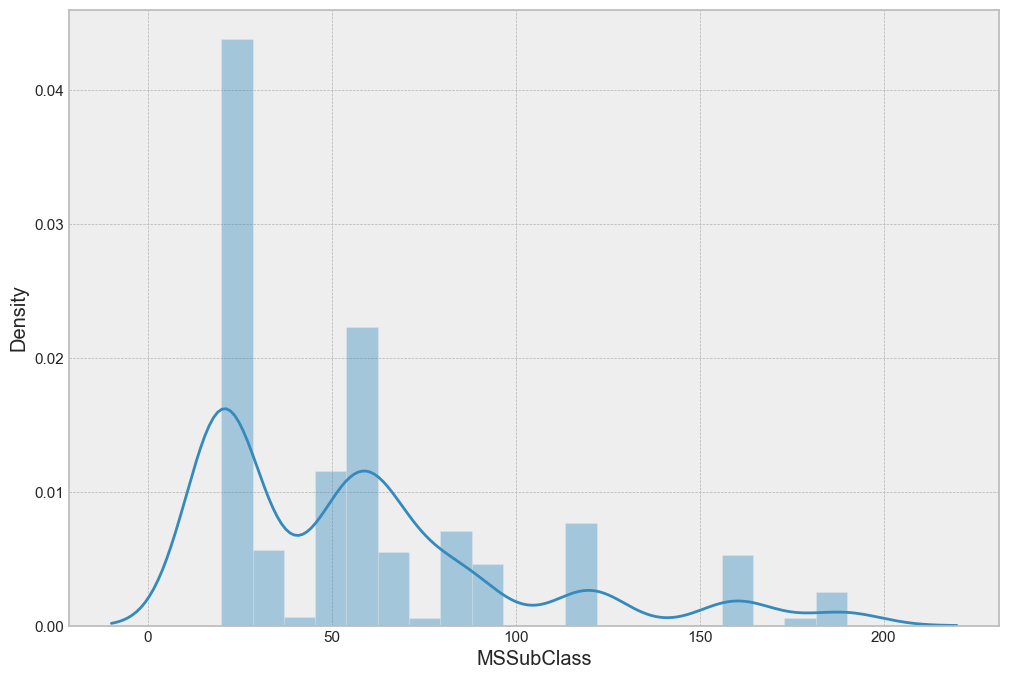

In [410]:
plt.figure(figsize=(12,8))
sns.distplot(df_test['MSSubClass'])
import statistics
print("Standard Deviation of df_test_MSSubClass is % s " 
                % (statistics.stdev(df_test['MSSubClass'])))

In [347]:
X_test.shape

(1459, 90)

In [348]:
X_test.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.000000e+00,-6.435039e-16,1.825718e-16,-3.728742e-16,-1.366585e-17,2.164020e-16,-9.849166e-17,-2.821397e-17,-1.200794e-16,1.848042e-16,-1.704717e-16,-2.401789e-16,-1.749056e-16,5.055251e-16,2.682678e-16,-8.566907e-17,-5.460062e-17,-1.815451e-16,1.180037e-16,2.425161e-16,1.744343e-16,2.956235e-17,3.904953e-16,-4.076159e-16,9.858913e-17,3.409357e-16,-1.028850e-16,3.680514e-16,-2.044168e-17,-8.428064e-17,-1.660242e-16,-5.587254e-17,-6.455634e-18,1.121609e-16,6.007076e-17,2.390996e-16,8.133143e-17,2.513625e-17,6.462935e-17,2.170842e-16,1.235462e-16,-2.764232e-16,1.564073e-16,-1.142000e-16,-1.260638e-16,1.873885e-16,-1.701245e-16,1.877268e-16,2.360938e-16,-7.795072e-16,6.788352e-17,-5.597368e-16,-5.004140e-17,1.364491e-16,2.654671e-16,-5.619528e-16,3.327079e-16,1.178806e-16,1.419415e-16,4.871206e-17,-4.954078e-16,-5.480552e-16,4.481369e-16,1.128912e-16,2.653224e-16,2.902559e-17,1.235484e-15,-6.480607e-17,2.078497e-16,1.760744e-15,-2.959431e-16,-4.380107e-16,-9.263773e-16,-2.624799e-16,3.008049e-16,1.744829e-16,-8.746762e-16,4.598957e-16,3.258597e-17,1.827207e-16,-1.955943e-16,-5.002942e-17,2.158393e-16,3.470607e-16,4.495357e-16,2.255264e-17,-1.211976e-16,-4.376726e-16,3.278988e-16,1.467835e-16
1,-6.435039e-16,1.000000e+00,3.095301e-16,-1.887231e-16,2.351745e-17,1.016465e-16,-3.141790e-16,-1.941714e-16,2.208244e-16,-1.802036e-16,-1.160600e-16,-8.413305e-19,-1.622206e-16,-1.037865e-16,-3.301060e-17,-3.317028e-17,-3.271556e-16,1.650234e-16,2.161164e-16,5.766481e-17,-1.379556e-17,1.650290e-16,1.696521e-16,-2.277373e-16,2.994658e-16,-1.753990e-17,1.194209e-16,-2.710185e-16,-6.203621e-17,-1.119860e-16,-1.029375e-16,-3.180012e-17,-6.812238e-17,4.935219e-17,-1.214669e-17,2.636874e-16,-4.239762e-17,1.243450e-16,9.395008e-17,6.930233e-17,6.142561e-18,-3.720102e-17,7.647811e-19,-2.141636e-17,1.027607e-19,-3.750792e-17,1.385406e-16,-2.059593e-16,1.102630e-16,-1.264589e-16,1.249378e-16,1.492492e-16,1.107337e-16,-2.482313e-16,-2.841043e-16,4.740459e-16,4.039546e-17,-1.497550e-17,1.079229e-16,4.113308e-16,-1.381768e-16,1.785953e-16,-1.614264e-16,-2.128629e-16,1.872995e-16,9.413092e-17,4.174208e-17,-2.106540e-16,-2.632899e-16,4.884364e-16,8.062602e-17,3.388878e-16,6.637640e-16,-3.421826e-16,-5.948545e-16,-3.936907e-16,1.385007e-15,-5.321901e-16,-4.764512e-16,-1.419130e-16,1.074758e-17,5.067503e-16,2.064289e-16,2.208414e-16,-3.553314e-16,1.251822e-16,-3.032080e-16,8.745175e-16,-5.847831e-16,2.789157e-16
2,1.825718e-16,3.095301e-16,1.000000e+00,-3.160053e-16,7.205561e-17,4.305423e-18,1.465829e-16,-1.517953e-17,2.095558e-17,-1.581418e-16,-1.590227e-16,-2.634179e-16,-2.984850e-16,-3.387564e-16,6.789806e-17,3.141101e-16,-5.159920e-18,-7.219695e-17,-4.976564e-17,-7.477786e-17,-3.411396e-17,-1.678810e-16,4.074486e-16,-4.235955e-17,2.470691e-16,2.315294e-16,-1.550073e-16,-1.448620e-16,-3.621800e-17,1.027485e-16,3.275613e-17,-4.887613e-17,-1.057031e-16,8.187689e-17,7.228599e-17,1.326307e-16,2.121041e-16,1.418318e-17,-2.406917e-16,-4.472896e-17,-6.416369e-17,-3.038025e-16,4.190825e-16,-2.807755e-17,-4.880186e-17,6.535751e-17,-1.778366e-16,1.945342e-16,5.617871e-17,-7.578196e-18,1.860406e-16,1.056412e-16,-9.656414e-17,4.583071e-16,2.680652e-16,9.239817e-16,-3.503524e-17,-4.301570e-16,-1.625823e-16,-3.384226e-16,-4.389926e-17,1.864136e-16,1.240932e-16,-3.316752e-16,2.098985e-16,-1.664775e-16,-1.229579e-16,-2.994984e-16,-1.826252e-16,-5.526930e-16,1.500387e-16,8.954703e-17,3.819801e-16,-5.869011e-16,-2.576009e-16,1.881635e-16,-4.824770e-16,-1.483972e-15,-3.645559e-16,-6.095442e-17,-7.364932e-17,2.479938e-16,-1.842965e-16,1.804476e-16,4.843085e-16,4.614993e-16,-3.921750e-16,-2.465809e-16,-2.080912e-16,1.415176e-16
3,-3.728742e-16,-1.887231e-16,-3.160053e-16,1.000000e+00,8.258382e-17,-2.388121e-16,3.122

In [349]:
#checks if there is difference nb of columns between the two files and drop them
extra_cols = set(X_test.columns) - set(X_train.columns)
print("Extra columns:", extra_cols)

Extra columns: {88, 89, 87}


In [350]:
X_test = X_test.drop(columns=extra_cols)

In [351]:
print(X_train.shape)
print(X_test.shape)


(1460, 87)
(1459, 87)


In [352]:
#predict the target
Y_pred=reg.predict(X_test)

In [353]:
Y_pred

array([[0.12582251],
       [0.28852853],
       [0.26984568],
       ...,
       [0.17065874],
       [0.09746628],
       [0.25717777]])

In [354]:
#cross validation my Linear model
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())

Cross-validated R² scores: [0.87436861 0.88278294 0.85872993 0.7909441  0.82959569 0.86268951
 0.8196456  0.84678835 0.67585441 0.8678664 ]
Mean R² score: 0.8309265557867438


In [355]:
#cross validation my Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=0)

In [356]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [357]:
Y_pred = regressor.predict(X_test)

In [358]:
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())

Cross-validated R² scores: [0.41303212 0.41921893 0.61315166 0.40671054 0.49093536 0.66442366
 0.39768785 0.64889981 0.61862086 0.60377208]
Mean R² score: 0.5276452868033379


In [359]:
# Create a random forest regression model
model = RandomForestRegressor(n_estimators=5)

In [360]:
# Fit the model to the data
model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=5)

In [361]:
# Predict the response for a new data point
Y_pred = model.predict(X_test)

In [362]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())

Cross-validated R² scores: [0.70129497 0.73518905 0.77743304 0.58905212 0.6619925  0.77405524
 0.75756695 0.74859033 0.60372573 0.70608282]
Mean R² score: 0.7054982739281359
